# Finding Nash Equilibriums 

I've always heard about to player games in game theory. I like the idea that the players could find nash equilibriums by taking the opponents last move into account and changing thier strategy accordingly. 
Player's strategy can be represented by a probability distribution over tensors. Every round the player can update thier strategy based on thier loss. They should make small updates so as to not overcorrect. 


In [42]:
import torch



In [58]:



import matplotlib.pyplot as plt

def solve(game, iter=100, alpha=.05):
    q = torch.randn(game.size()[0],requires_grad=True)
    p = torch.randn(game.size()[1], requires_grad=True)
    l1_list, l2_list, p_list, q_list = [], [],[],[]

    def update(l1, l2, p, q):
        l1_list.append(l1), l2_list.append(l2), p_list.append(p), q_list.append(q)


    alpha = 0.1
    for i in range(iter):
        q_ten = torch.softmax(q, dim=0)
        p_ten = torch.softmax(p,dim=0)

        l1 = q_ten @ (game @ torch.tensor([1.,0])) @ p_ten
        l2 = q_ten @ (game @ torch.tensor([0,1.])) @ p_ten
        update(l1.data.numpy().copy(), l2.data.numpy().copy(), p_ten[0].data.numpy().copy(), q_ten[0].data.numpy().copy())


        l1.backward(retain_graph=True)
        with torch.no_grad():
            q.data.add_(alpha * q.grad.data)
            q.grad.zero_()
            p.grad.zero_()

        l2.backward(retain_graph=True)
        with torch.no_grad():
            p.data.add_(alpha * p.grad.data)
            p.grad.zero_()
            q.grad.zero_()  
    print('p', p)
    print('q',q)
    print('l1',l1)
    r = range(len(l1_list))
    plt.title('loss')
    plt.plot(r, l1_list, label='l1')
    plt.plot(r, l2_list, label='l2')
    plt.legend()
    plt.show()

    plt.title('strategy')
    plt.plot(r, p_list, label='p')
    plt.plot(r, q_list, label='q')
    plt.legend()
    plt.show() 





p tensor([-2.2269,  2.4111], requires_grad=True)
q tensor([-2.4356,  2.1756], requires_grad=True)
l1 tensor(-1.9907, grad_fn=<DotBackward0>)


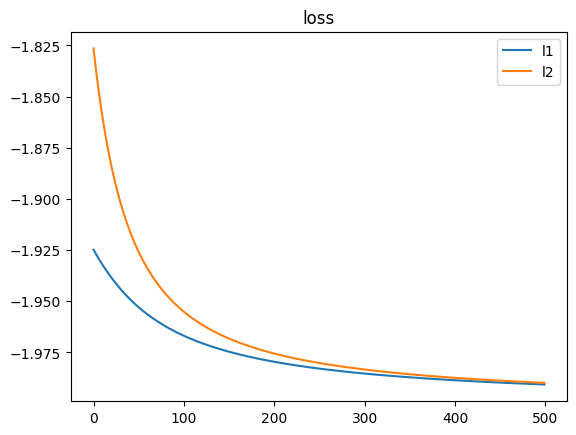

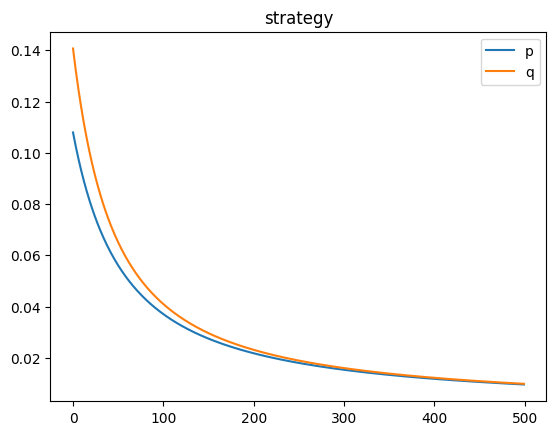

In [53]:
# Prisoners del
game = torch.tensor([
    [[-1,-1],[-3,0]]
    ,[[0, -3],[-2,-2]]
    ],dtype=torch.float)
solve(game, iter=500)


p tensor([ 1.7075, -0.7546], requires_grad=True)
q tensor([-0.1355, -0.2719], requires_grad=True)
l1 tensor(0.0220, grad_fn=<DotBackward0>)


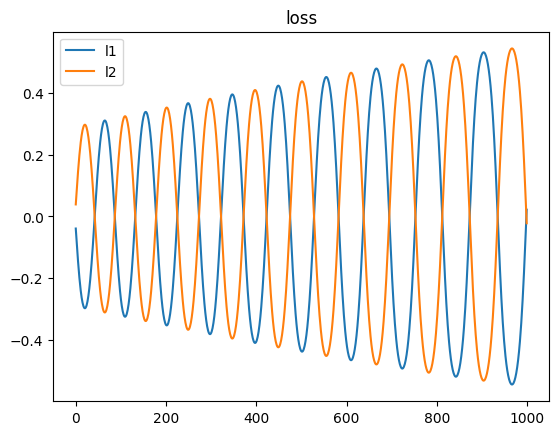

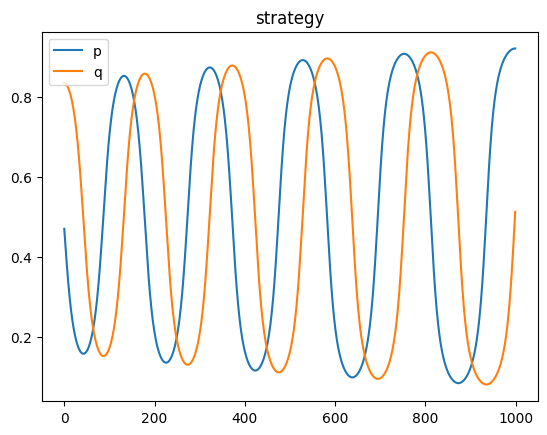

In [59]:
# Mathcing pennies

game = torch.tensor([
    [[1,-1],[-1,1]]
    ,[[-1, 1],[1,-1]]
    ],dtype=torch.float)
solve(game,iter=1000)


p tensor([ 0.1534, -0.1125,  1.3324], requires_grad=True)
q tensor([-1.5195,  1.3991, -1.1324], requires_grad=True)
l1 tensor(0.3891, grad_fn=<DotBackward0>)


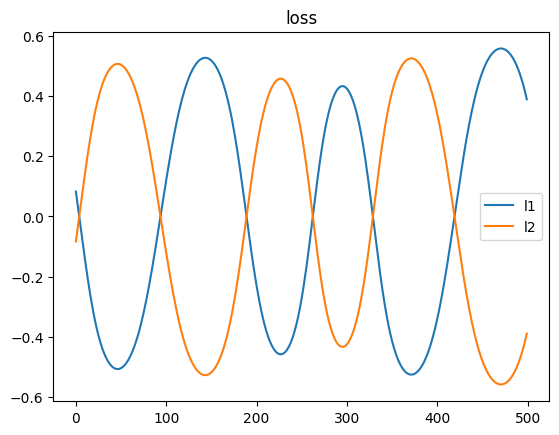

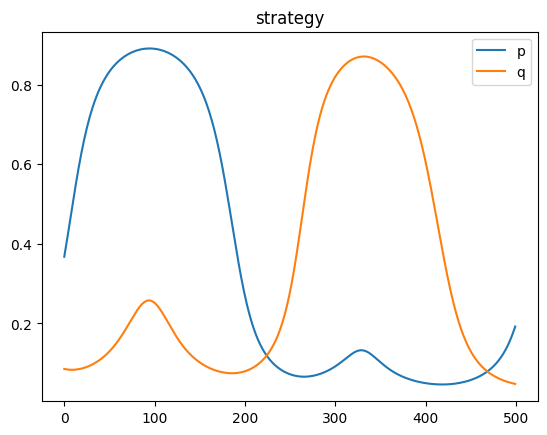

In [64]:
# Rock paper scissors
game = torch.tensor([
    [[0,0],[1,-1], [-1,1]]
   ,[[-1,1],[0,0], [1,-1]]
   ,[[1,-1],[-1,1], [0,0]]
    ],dtype=torch.float)
solve(game, iter=500, alpha=.1)